In [1]:
# import and investigate the data
import pandas as pd

data = pd.read_csv("insurance.csv")
data.info
#the data is safe to use even though it might not be random

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

## summary stats on the data

In [2]:
#group patients by region
group_by_region = data.region.value_counts()
group_by_region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [3]:
# check gender proportions in each region
gender_spread =data.groupby(["sex","region"]).age.count().reset_index()
# gender_spread.pivot(index=region, columns=sex, values=age)
gender_spread.columns
gender_spread.pivot(index="sex", columns="region", values="age")

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [4]:
import numpy as np
prop_r_s=pd.crosstab(data.smoker,data.region, normalize = True)*100
# prop_r_s = np.round(prop_r_s)
prop_r_s

region,northeast,northwest,southeast,southwest
smoker,,,,
no,19.207773,19.955157,20.403587,19.955157
yes,5.007474,4.334828,6.801196,4.334828


## data visualization

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns


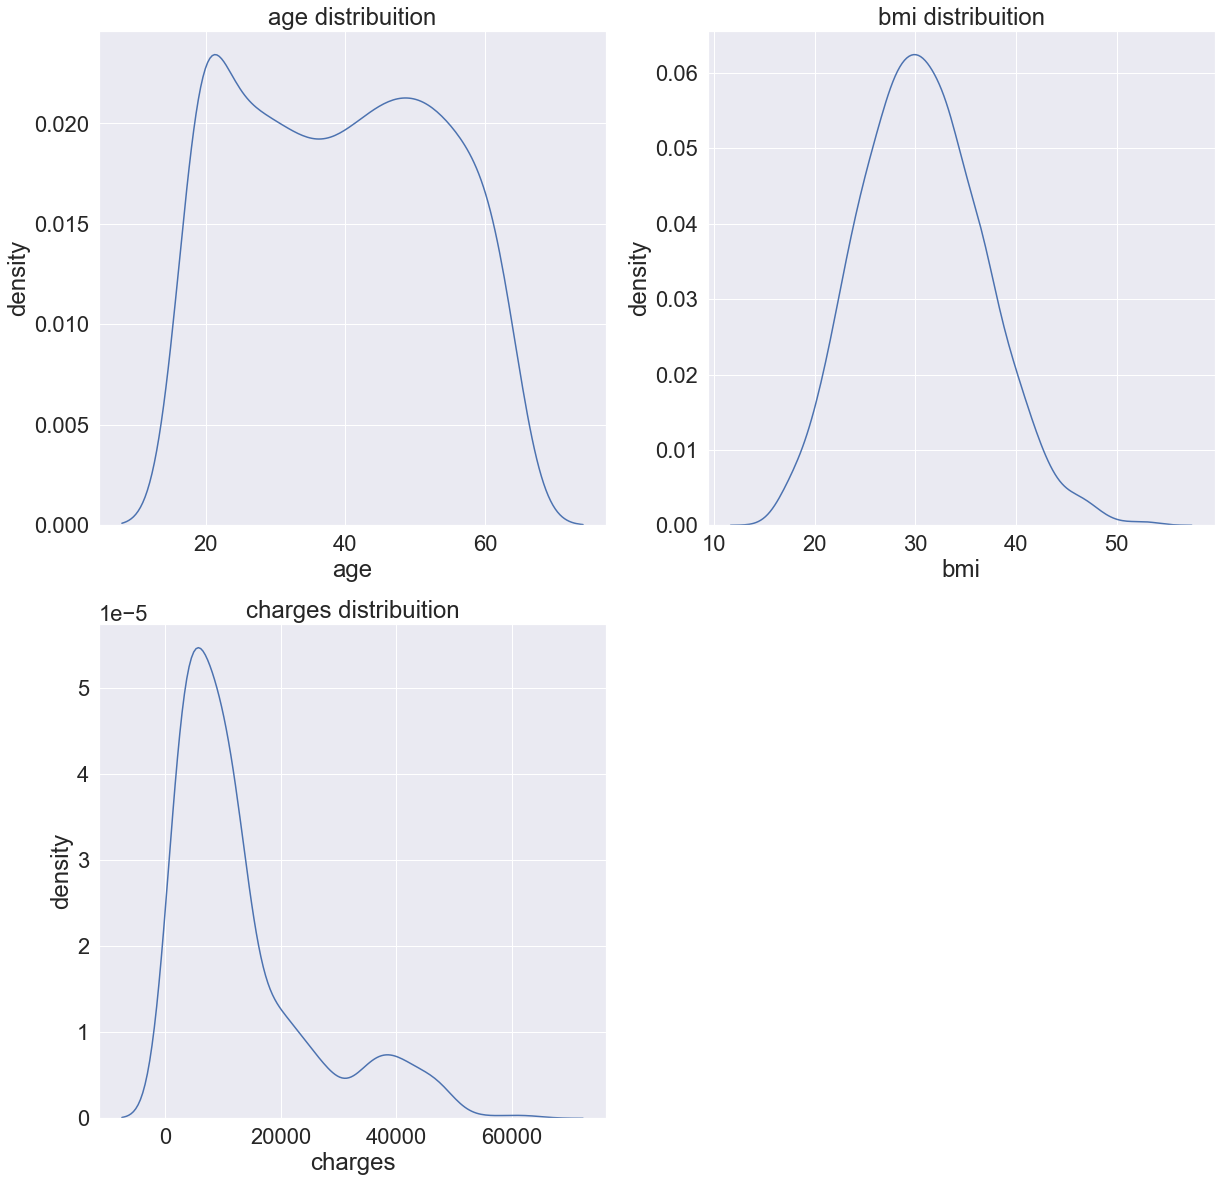

In [6]:
# kde plot of age, bmi, charges distribuition

sns.set()
plt.figure(figsize =[20,20])
sns.set_context(context="notebook",font_scale =2)
a = 1
for i in data[["age", "bmi","charges"]]:
    plt.subplot(2,2,a)
    sns.kdeplot(data[i],)
    plt.title(i + " distribuition")
    plt.xlabel(i)
    plt.ylabel("density")
    a+=1
plt.show()

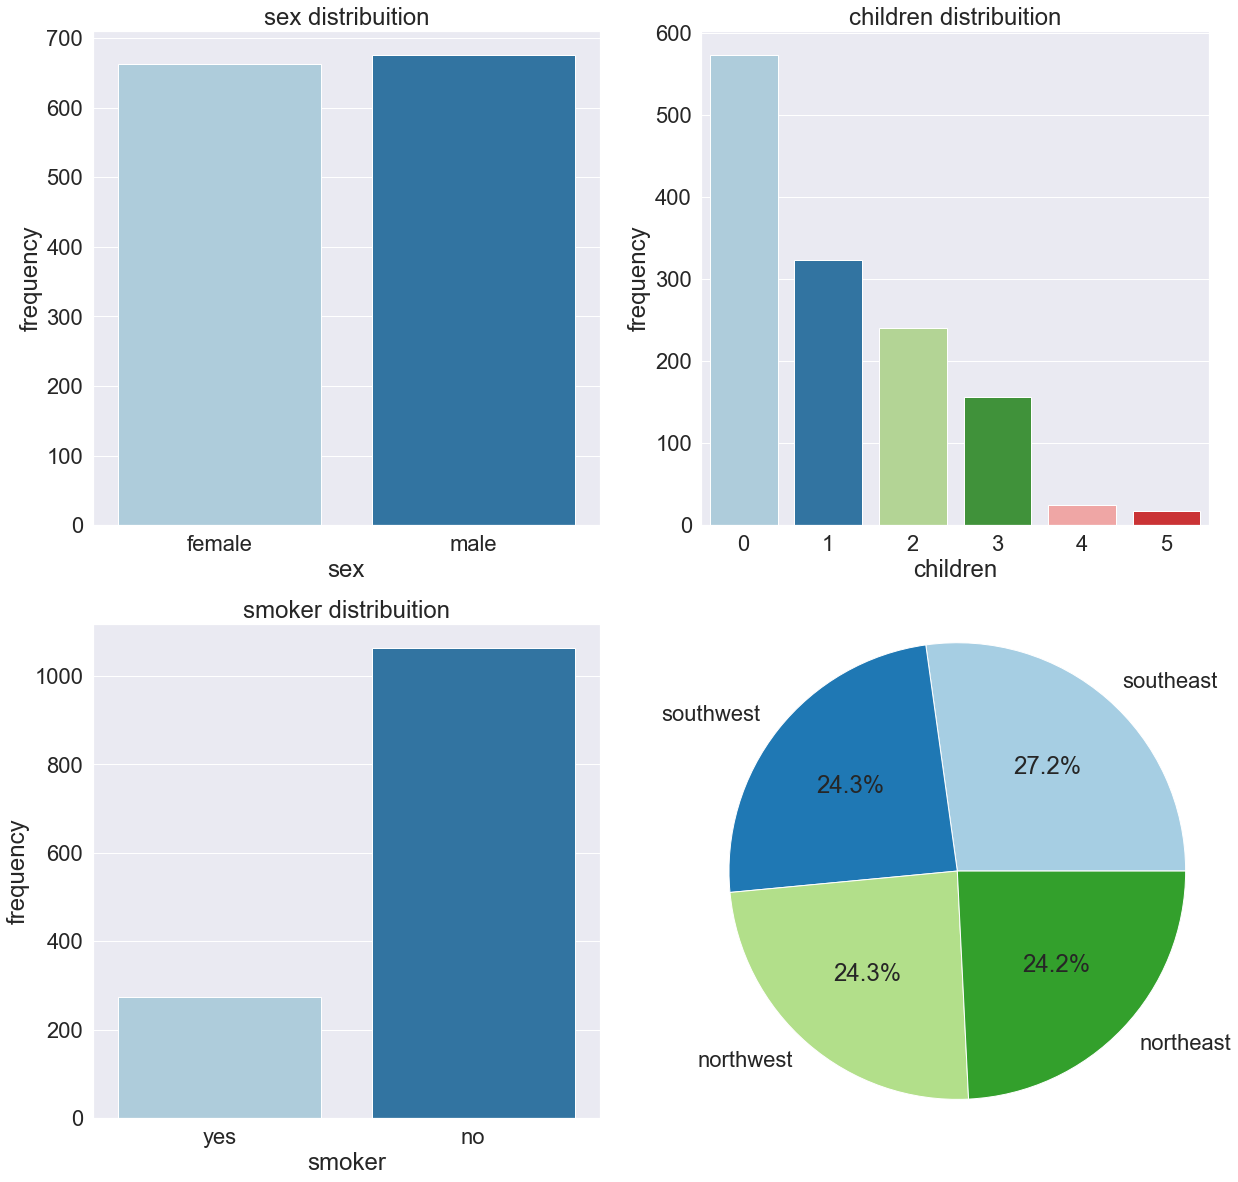

In [7]:
plt.figure(figsize =[20,20])
sns.set_palette("Paired")
a = 1
for i in data[["sex", "children", "smoker"]]:
    plt.subplot(2,2,a)
    sns.countplot( data = data , x =i)
    plt.title(i + " distribuition")
    plt.xlabel(i)
    plt.ylabel("frequency")
    a+=1
plt.subplot(2,2,4)
pie = data.region.value_counts().reset_index()
plt.pie(pie.region, labels =pie["index"], autopct ="%0.1f%%")
plt.axis("equal")
plt.show()

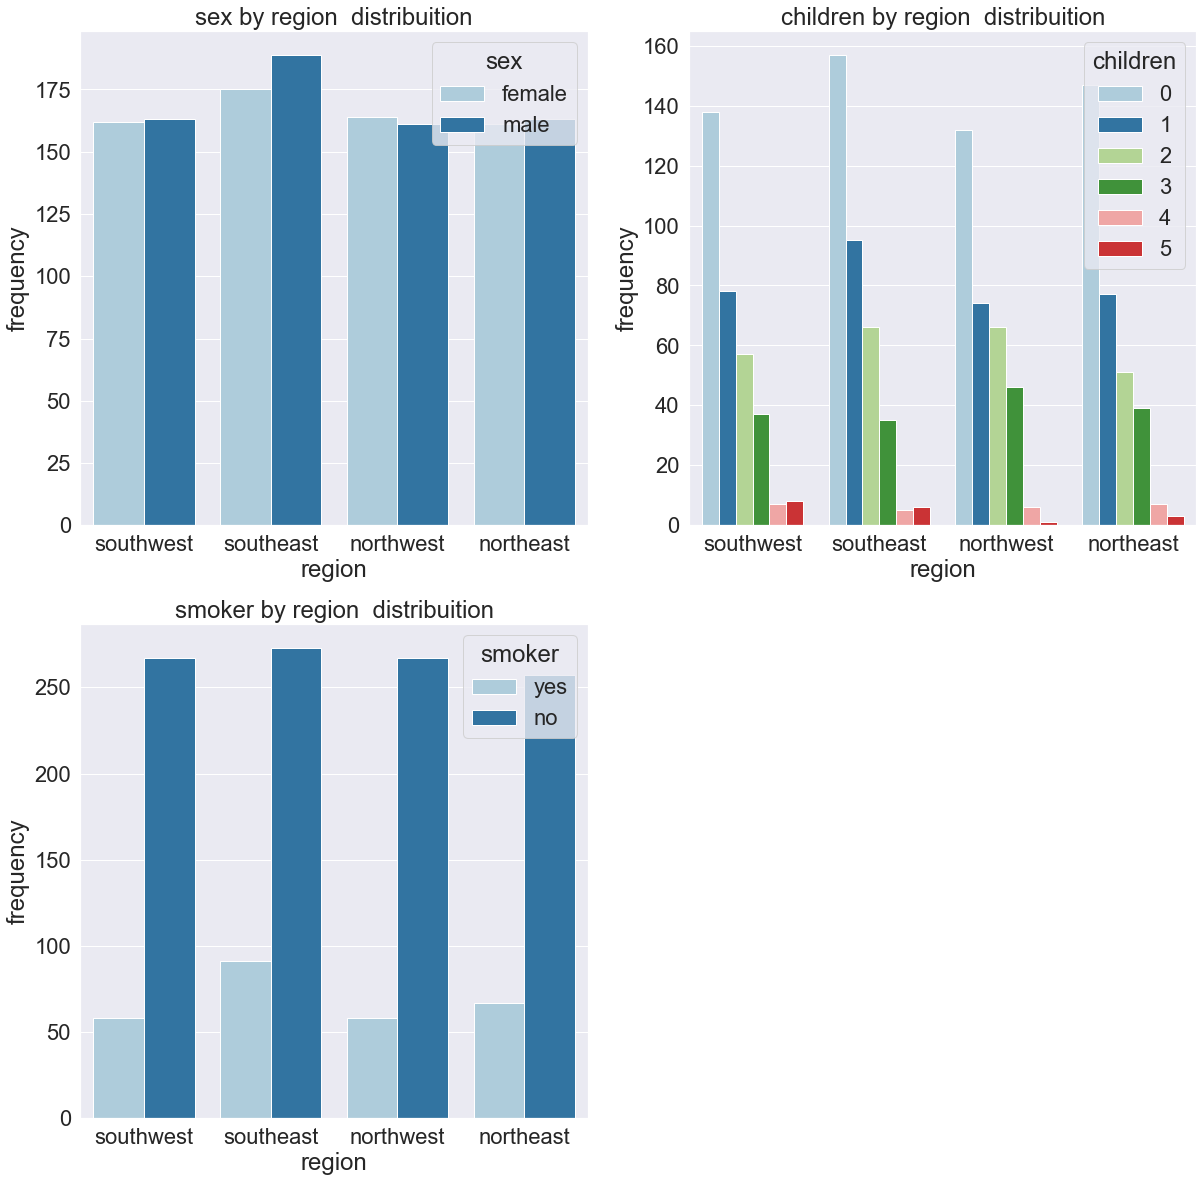

In [8]:
plt.figure(figsize =[20,20])
a = 1
for i in data[["sex", "children", "smoker"]]:
    plt.subplot(2,2,a)
    sns.countplot( data = data , x ="region", hue = i)
    plt.title(i +" by region  distribuition")
    plt.xlabel("region")
    plt.ylabel("frequency")
    a+=1
plt.show()

## checking for associations

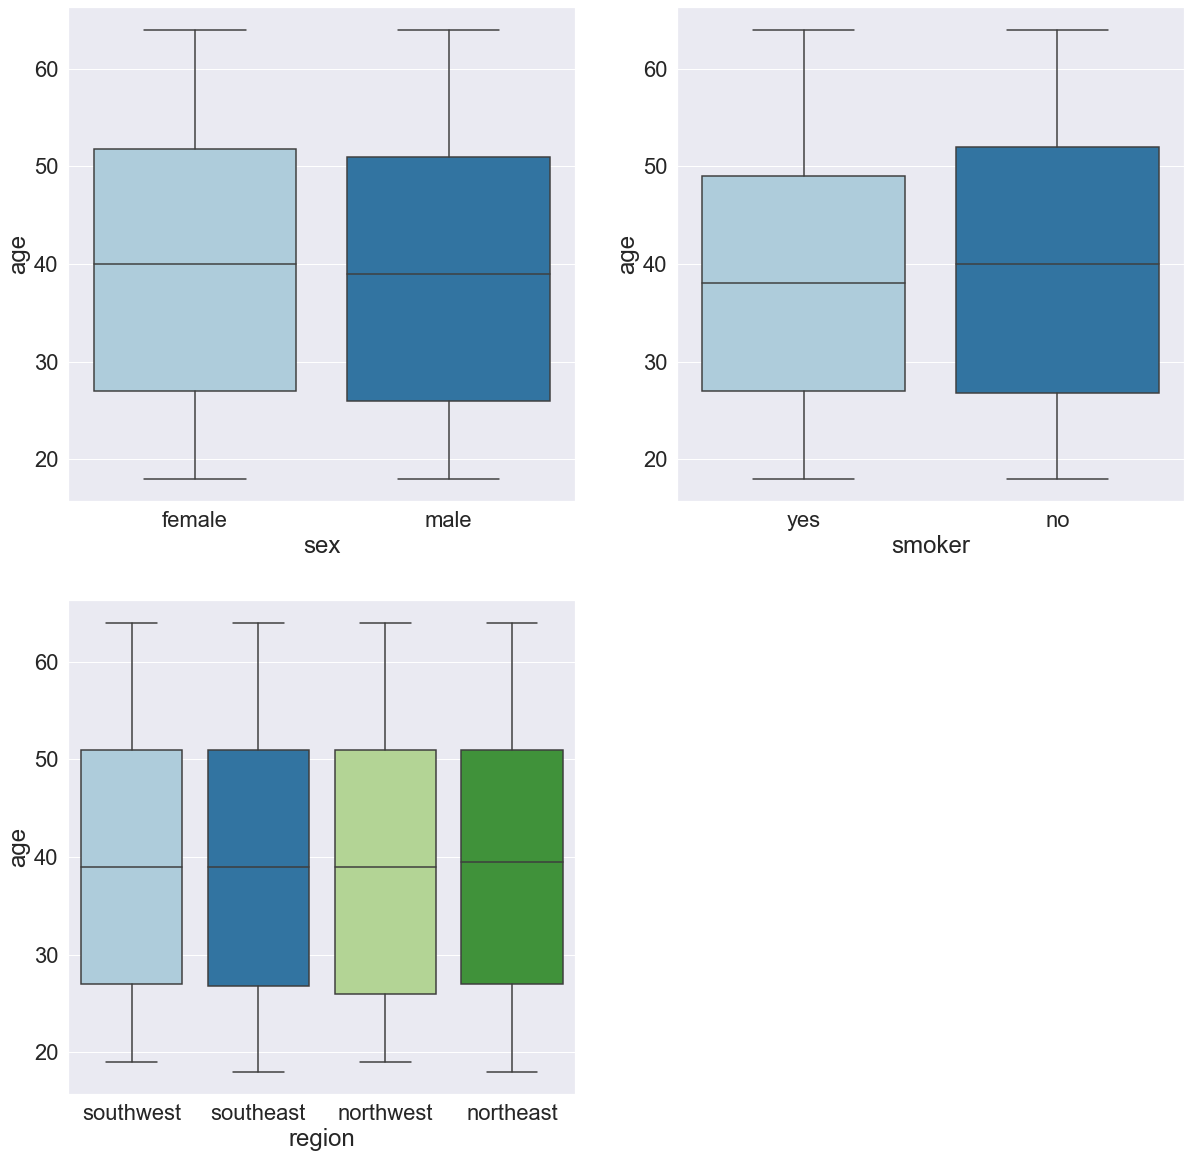

In [9]:
# association between age and sex,region and smoker
plt.figure(figsize =[20,20])
a = 1
for i in data[["sex","smoker","region"]]:
    plt.subplot(2,2,a)
    sns.boxplot( data =data[["age","sex","smoker","region"]],y="age",x=i)
    a+=1
plt.show()

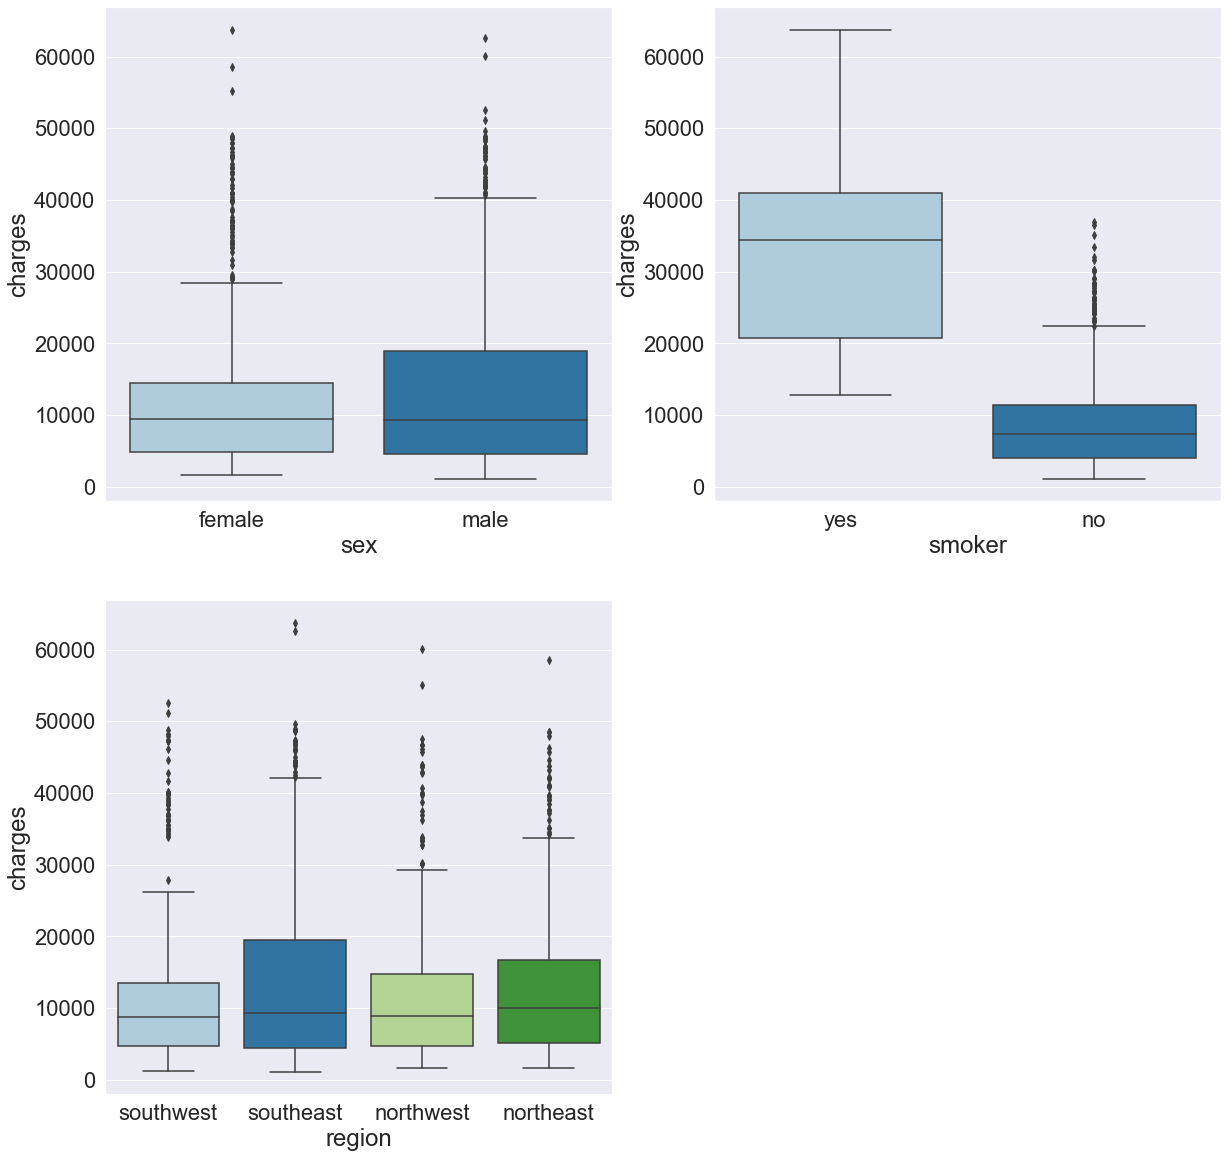

In [10]:
# charges against qualitave data
plt.figure(figsize =[20,20])
a = 1
for i in data[["sex","smoker","region"]]:
    plt.subplot(2,2,a)
    sns.boxplot( data =data[["charges","sex","smoker","region"]],y="charges",x=i)
    a+=1
plt.show()
    

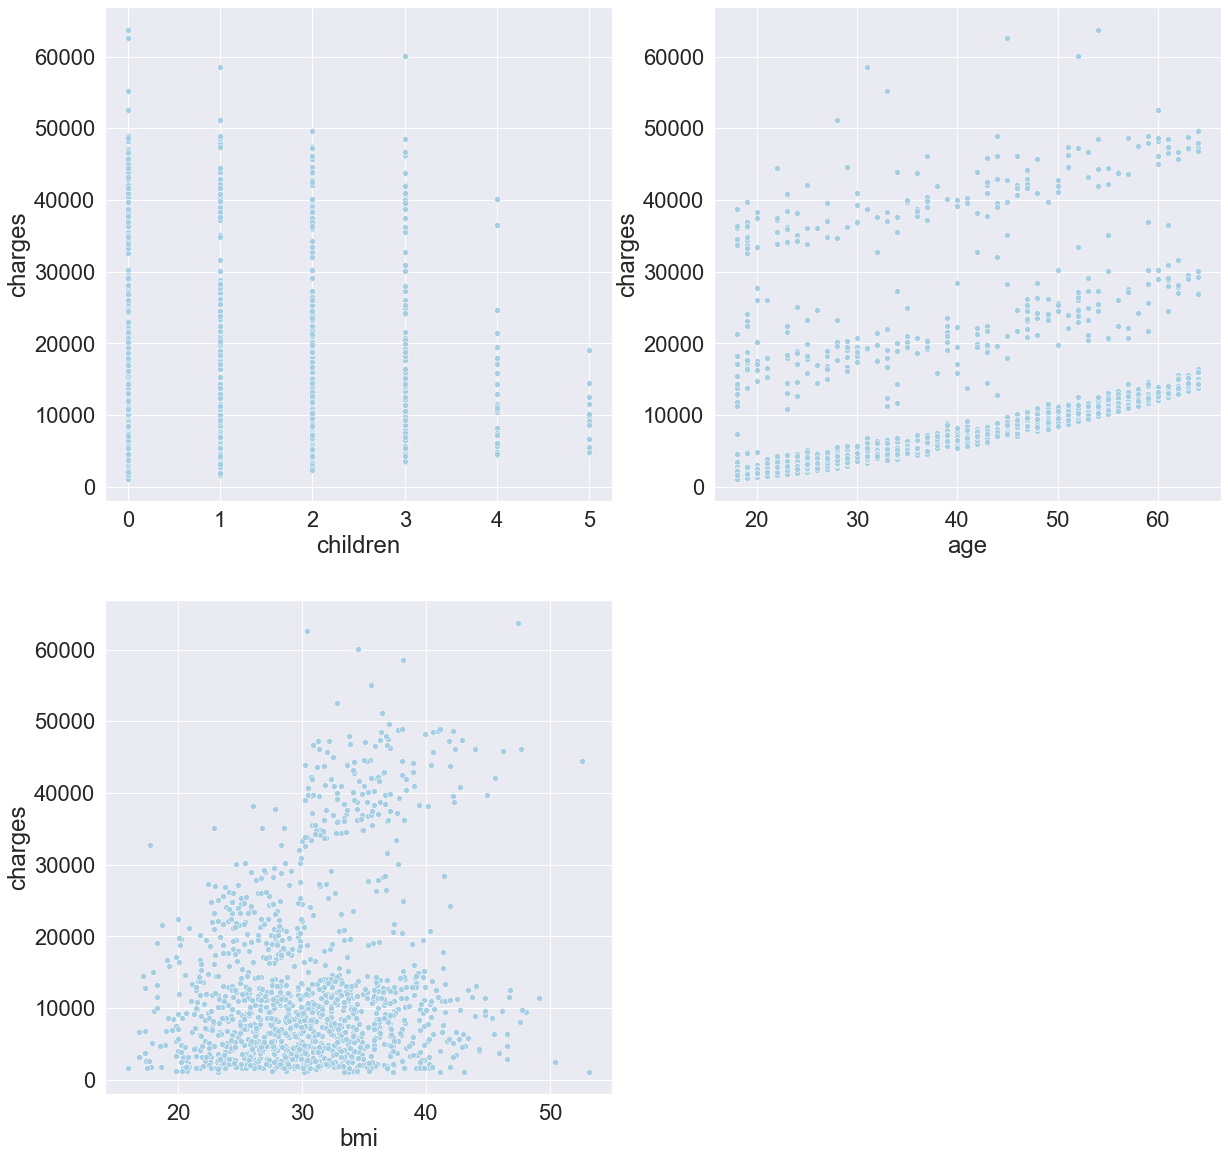

In [11]:
# charges against quantitative data
plt.figure(figsize =[20,20])
a = 1
for i in data[["children","age","bmi"]]:
    plt.subplot(2,2,a)
    sns.scatterplot( data =data[["charges","children","age","bmi"]],y="charges",x=i)
    a+=1
plt.show()

## multinomial regresion model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
# using smoker and age to predict charges
# y = np.array(data['charges']).reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split( data[["age","smoker"]],data['charges'],test_size=0.2,random_state=2)

model = LinearRegression()
model.fit(np.array(y_train).reshape(-1,1),y_train)
model.score(np.array(y_test).reshape(-1,1),y_test)

1.0